In [1]:
from os.path import join, dirname
from glob import glob

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm, colors, patches, lines

from nilearn import image, plotting, masking
from nilearn.maskers import NiftiLabelsMasker

from tqdm import tqdm

In [2]:
dir_root = join('/mnt/ext5/GP/fmri_data')
dir_data = join(dir_root,'raw_data')
dir_mask = join(dir_root,'masks')

In [3]:
list_dlPFC_cTBS = [
    '09', '10', '18', '21', '22'
    , '24', '27', '34', '35', '36'
    , '38', '42', '57', '59', '62'
    , '66', '67'
]
list_M1_cTBS = [
    '08', '11', '17', '19', '20'
    , '26', '32', '33', '37', '39'
    , '40', '41', '56', '58', '61'
    , '63', '65'
]
## GP50은 GP26과 동일인물
list_dlPFC_20Hz = [
    '43', '44', '45', '46', '47'
    , '48', '49', '51', '53', '54'
    , '55'
#     , '50'
]
list_subj = sorted(list_dlPFC_cTBS+list_M1_cTBS+list_dlPFC_20Hz)

In [4]:
list_GA = []
list_ = glob(join('/mnt/ext5/GA/fmri_data/raw_data/GA??'))
for dname in list_:
    list_GA.append(dname.split('/')[-1])

In [5]:
dx = pd.DataFrame(index=list_GA)
dx['group'] = 'no_stim'

In [6]:
dy = pd.DataFrame()
for nn in list_subj:
    subj = 'GP%s'%nn
    group = 'DLPFC_cTBS' if nn in list_dlPFC_cTBS else ('M1_cTBS' if nn in list_M1_cTBS else 'DLPFC_20Hz')
    new_row = pd.Series(data=group, name=subj)

    dy = pd.concat(
        [dy, new_row.to_frame().T]
        , axis='index'
        , ignore_index=False
    )
dy = dy.rename({0:'group'}, axis='columns')

In [7]:
dz = pd.concat([dx, dy])
del dx, dy
dz

,group
GA01,no_stim
GA35,no_stim
GA26,no_stim
GA02,no_stim
GA18,no_stim
...,...
GP62,DLPFC_cTBS
GP63,M1_cTBS
GP65,M1_cTBS
GP66,DLPFC_cTBS


---

ROIs

In [11]:
list_ = glob(join(dir_mask,'mask.TTatlas.*.resampled.nii'))+glob(join(dir_mask,'target.r=6.nii'))
list_

['/mnt/ext5/GP/fmri_data/masks/mask.TTatlas.caudate.resampled.nii',
 '/mnt/ext5/GP/fmri_data/masks/mask.TTatlas.putamen.resampled.nii',
 '/mnt/ext5/GP/fmri_data/masks/target.r=6.nii']

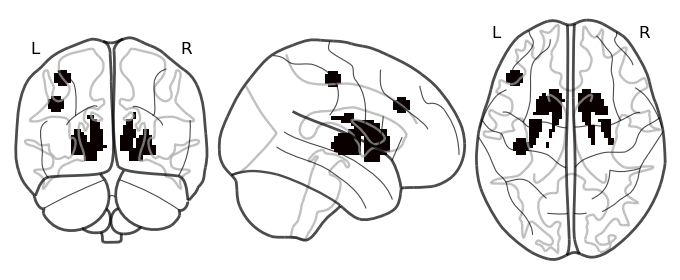

In [30]:
img_roi = image.math_img(img1=list_[0], formula='img1>10')

for fname in list_:
    img_roi = image.math_img(img1=img_roi, img2=fname, formula='(img1+img2)>0')
    
plotting.plot_glass_brain(img_roi)